## Google Drive 와 연동

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


### 필요한 라이브러리 설치하기

#### 'pandas', 'numpy', 'sklearn', 시각화를 위해 'matplotlib' 필요 !pip install pandas...

In [2]:
import pandas as pd
import numpy as np

#### 데이터프레임 제공하는 라이브러리인 pandas, 수식 계산에 활용할 numpy 라이브러리 호출
#### 실습에 필요한 데이터는 csv 파일이므로 read_csv()를 사용

# 공정(설비) 개요

● 공정(설비) 정의 및 특징
- 분무건조기의 건조구동장치는 전처리 공정(용해공정, 살균공정)에서 생산된 액상혼합 물 상태의 반제품을 다시 분말화하는 작업을 한다. 분무건조(spray drying)는 액상 건 조물에 열풍을 분무·분산하여 급속하게 건조시키는 방식이며, 점토상, 현탁액상에서 분립상의 제품을 얻을 수 있다.
- 건조구동장치는 크게 건조기 본체, 가열장치(히터), 환기장치(송풍기) 등의 구조로 이 루어진다. 가열장치는 주로 외기를 도입·가열하여 건조매체가 되는 열풍을 공급하며, 공기의 가열전·후에 필터를 설치하여 공기중의 불순물을 제거한다.

# 이슈사항(Pain point)

● 공정(설비)상의 문제현황
- 건조기는 최종적으로 분말형태로 생산되는 완제품의 품질을 결정짓는 주요 공정설비 임에 따라 설비의 정상작동 여부, 특히 SOP에 따른 설비운영 셋팅값대로 항상 동일하 게 작동하여, 균일한 품질을 생산하는 것이 매우 중요하다. 건조공정이 제대로 이루어 지지 않으면 입자의 크기가 여과기준치에 부합하지 않게 되어 불량수량으로 모두 걸 러지기 때문에 생산량도 대폭 감소할 뿐만 아니라, 최종 생산되는 완제품의 품질도 보 장할 수 없게 된다.
- 게다가 건조기는 전 제품 생산라인에 사용되는 설비이기 때문에 타 설비보다 사용시 간과 빈도가 높아 설비의 고장관리 및 수명관리가 더욱 중요하다. 설비 결함 및 고장 은 건조기 본체, 가열장치(히터), 환기장치(송풍기) 등 구조물이나 부품 중 어디에서나 발생할 수 있는데, 이 중 주요 부품인 모터 베어링은 전기 침식, 부적절한 윤활 및 오 염, 진동으로 인한 손상, 부적절한 설치와 손상 설치, 불충분한 베어링 하중 등의 원인 으로 인해 주로 고장이 발생한다.
- 모터 베어링의 이상으로 건조구동장치의 기능이 저하되거나 작동을 멈추면 바로 제품 품질 또는 생산 자체에 영향을 미치기 때문에, 첫 이상징후를 보일 때 대처하는 것이 가장 좋으나 일반적으로 눈에 보이는 것이 아니므로 고장이 발생하는 한계점을 넘기 전에 이상징후를 발견하기가 쉽지 않다. 모터 베어링에 이상이 있을 경우 평상시와는 다른 소음과 진동이 발생하게 되는데, 이를 조기에 발견하기 위해 현장에서 종종 취하는 방법 중 하나는 청진기를 설비에 갖다 대고 구동부의 소리를 듣고 이상 여부를 찾 아내는 것이다. 이같은 방법은 고도의 능력과 오랜 경험과 노하우, 직감을 필요로 하 며, 이마저도 인력에 공백이 생기는 경우 대처가 어렵다.

# 분석목표

- 건조구동장치 주요 부품 중 하나인 모터 베어링은 전기 침식, 부적절한 윤활 및 오염, 진동으로 인한 손상, 부적절한 설치와 손상 설치, 불충분한 베어링 하중 등에 의해 파 손/고장이 발생할 수 있으며, 이로 인해 비정상적 소음 또는 진동이 발생할 수 있다. 따 라서 건조구동부에 설치된 무선 진동센서를 통해 수집한 진동데이 터의 패턴을 분석하고, 일반적인 진동데이터 패턴에서 벗어난 진동데이터들을 이상치 로 간주해 설비 이상징후를 감지하고자 한다.
- 건조구동장치의 모터는 베어링에 이상이 있으면 정상 작동시와는 다른 패턴의 진동이 발생하기 때문에, 구동부에 설치된 진동센서를 통해 수집한 정상 작동시의 z축 진동값 과 비정상 작동시의 z축 진동값의 패턴을 분석하기 위한 데이터이다.

# 제조데이터 소개

●  데이터 수집 방법
- 제조 분야 : 분무건조공법을 이용한 분말유크림 제조
- 제조 공정명: 건조(건조구동장치)
- 수집장비 : 무선 진동센서
- 수집기간 : 2020년 11월 7일 ~ 2020년 11월 20일 (약 14일)
- 수집주기 : 사이클타임 약 10분

### 데이터 불러오기

데이터셋은 데이터 수집일시(Date), z축 진동데이터(Sensor) 등 2개 칼럼으로 이뤄져 있으며, 이 중 진동데이터(Sensor)는 연속형 수치 형태이다.  

진동데이터는 10분 간격으로 1,024개의 샘플링 값을 가지고 있으며, 이는 아날로그 형태의 진동데이터의 패턴을 수치화한 것이므로 각 시점을 관측치 1,024개의 샘플링 값을 변수로 하여 데이터를 전처리 한다. 4번의 시점에서 샘플링 레이트의 변 경으로 인해 2,048개의 진동값이 존재하는 경우가 있어 해당 시점은 제외하였다.

#### data1은 정상모터, data2는 비정상 모터에서 산출한 데이터
#### 진동데이터는 시점마다 1,024개 샘플링. 시점에 따라 인덱스 (1부터 1024)까지를 새로 생성

In [3]:
root_path = '/content/gdrive/My Drive/ML/Dryer'

In [4]:
raw_data1 = pd.read_csv(root_path+'/dataset/drying_actuator1.csv')
raw_data1

,Date,Sensor
0,2020-11-07T00:11:11.302000+00:00,0.000000
1,2020-11-07T00:11:11.302000+00:00,0.000000
2,2020-11-07T00:11:11.302000+00:00,0.000000
3,2020-11-07T00:11:11.302000+00:00,0.000000
4,2020-11-07T00:11:11.302000+00:00,0.000000
...,...,...
1709051,2020-11-20T07:56:37.294000+00:00,0.328125
1709052,2020-11-20T07:56:37.294000+00:00,-0.242188
1709053,2020-11-20T07:56:37.294000+00:00,-0.140625
1709054,2020-11-20T07:56:37.294000+00:00,0.328125


In [5]:
raw_data2 = pd.read_csv(root_path+'/dataset/drying_actuator2.csv')
raw_data2

,Date,Sensor
0,2021-11-07T00:11:11.302000+00:00,0.000000
1,2021-11-07T00:11:11.302000+00:00,0.000000
2,2021-11-07T00:11:11.302000+00:00,0.000000
3,2021-11-07T00:11:11.302000+00:00,0.000000
4,2021-11-07T00:11:11.302000+00:00,0.000000
...,...,...
1709051,2021-11-20T07:56:37.294000+00:00,1.542188
1709052,2021-11-20T07:56:37.294000+00:00,-0.242188
1709053,2021-11-20T07:56:37.294000+00:00,-0.140625
1709054,2021-11-20T07:56:37.294000+00:00,0.328125


In [6]:
raw_data = pd.concat([raw_data1, raw_data2], axis = 0)
raw_data

,Date,Sensor
0,2020-11-07T00:11:11.302000+00:00,0.000000
1,2020-11-07T00:11:11.302000+00:00,0.000000
2,2020-11-07T00:11:11.302000+00:00,0.000000
3,2020-11-07T00:11:11.302000+00:00,0.000000
4,2020-11-07T00:11:11.302000+00:00,0.000000
...,...,...
1709051,2021-11-20T07:56:37.294000+00:00,1.542188
1709052,2021-11-20T07:56:37.294000+00:00,-0.242188
1709053,2021-11-20T07:56:37.294000+00:00,-0.140625
1709054,2021-11-20T07:56:37.294000+00:00,0.328125


In [7]:
raw_data['index'] = raw_data.groupby(['Date']).cumcount() + 1
raw_data

,Date,Sensor,index
0,2020-11-07T00:11:11.302000+00:00,0.000000,1
1,2020-11-07T00:11:11.302000+00:00,0.000000,2
2,2020-11-07T00:11:11.302000+00:00,0.000000,3
3,2020-11-07T00:11:11.302000+00:00,0.000000,4
4,2020-11-07T00:11:11.302000+00:00,0.000000,5
...,...,...,...
1709051,2021-11-20T07:56:37.294000+00:00,1.542188,1020
1709052,2021-11-20T07:56:37.294000+00:00,-0.242188,1021
1709053,2021-11-20T07:56:37.294000+00:00,-0.140625,1022
1709054,2021-11-20T07:56:37.294000+00:00,0.328125,1023


In [8]:
# After the concat, the index needs to be reset
raw_data = raw_data.reset_index(drop = True)

#### 데이터 내용 확인

In [9]:
raw_data

,Date,Sensor,index
0,2020-11-07T00:11:11.302000+00:00,0.000000,1
1,2020-11-07T00:11:11.302000+00:00,0.000000,2
2,2020-11-07T00:11:11.302000+00:00,0.000000,3
3,2020-11-07T00:11:11.302000+00:00,0.000000,4
4,2020-11-07T00:11:11.302000+00:00,0.000000,5
...,...,...,...
3418107,2021-11-20T07:56:37.294000+00:00,1.542188,1020
3418108,2021-11-20T07:56:37.294000+00:00,-0.242188,1021
3418109,2021-11-20T07:56:37.294000+00:00,-0.140625,1022
3418110,2021-11-20T07:56:37.294000+00:00,0.328125,1023


#### 데이터 종류 및 개수 확인

In [57]:
len(raw_data)

3418112

In [58]:
raw_data.dtypes

Date       object
Sensor    float64
index       int64
dtype: object

### 데이터 특성 파악
#### 변수별 요약 통계량 확인

In [12]:
len(raw_data.Date.unique())

3334

In [13]:
raw_data.Sensor.mean()

-0.0013241586748035177

In [14]:
raw_data.Sensor.std()

0.4859881256577911

In [15]:
raw_data.Sensor.min()

-6.5359375

In [16]:
raw_data.Sensor.median()

-0.01484375

In [17]:
raw_data.Sensor.max()

7.490625

In [18]:
raw_data.Sensor.mode()

0    0.0
dtype: float64

### 데이터 정제 (전처리)
#### 필요 라이프러리 불러오기 - StandardScaler 함수는 변수의 평균을 0으로, 표준편차를 1로 만들어주는 함수

In [19]:
from sklearn.preprocessing import StandardScaler

#### 데이터 재정렬

In [20]:
raw_data

,Date,Sensor,index
0,2020-11-07T00:11:11.302000+00:00,0.000000,1
1,2020-11-07T00:11:11.302000+00:00,0.000000,2
2,2020-11-07T00:11:11.302000+00:00,0.000000,3
3,2020-11-07T00:11:11.302000+00:00,0.000000,4
4,2020-11-07T00:11:11.302000+00:00,0.000000,5
...,...,...,...
3418107,2021-11-20T07:56:37.294000+00:00,1.542188,1020
3418108,2021-11-20T07:56:37.294000+00:00,-0.242188,1021
3418109,2021-11-20T07:56:37.294000+00:00,-0.140625,1022
3418110,2021-11-20T07:56:37.294000+00:00,0.328125,1023


In [21]:
# Vectorized string function for Date Series data
raw_data.Date = raw_data.Date.str[2:16]
raw_data

,Date,Sensor,index
0,20-11-07T00:11,0.000000,1
1,20-11-07T00:11,0.000000,2
2,20-11-07T00:11,0.000000,3
3,20-11-07T00:11,0.000000,4
4,20-11-07T00:11,0.000000,5
...,...,...,...
3418107,21-11-20T07:56,1.542188,1020
3418108,21-11-20T07:56,-0.242188,1021
3418109,21-11-20T07:56,-0.140625,1022
3418110,21-11-20T07:56,0.328125,1023


In [22]:
counts = raw_data.groupby(raw_data.Date).count()
counts

,Sensor,index
Date,,
20-11-07T00:11,1024,1024
20-11-07T00:22,1024,1024
20-11-07T00:33,1024,1024
20-11-07T00:43,1024,1024
20-11-07T00:54,1024,1024
...,...,...
21-11-20T07:07,1024,1024
21-11-20T07:20,1024,1024
21-11-20T07:32,1024,1024


In [23]:
curr_date = counts[counts.Sensor == 1024].index
curr_date

Index(['20-11-07T00:11', '20-11-07T00:22', '20-11-07T00:33', '20-11-07T00:43',
       '20-11-07T00:54', '20-11-07T01:06', '20-11-07T01:17', '20-11-07T01:28',
       '20-11-07T01:39', '20-11-07T01:51',
       ...
       '21-11-20T06:08', '21-11-20T06:19', '21-11-20T06:32', '21-11-20T06:45',
       '21-11-20T06:55', '21-11-20T07:07', '21-11-20T07:20', '21-11-20T07:32',
       '21-11-20T07:44', '21-11-20T07:56'],
      dtype='object', name='Date', length=3330)

In [24]:
flt_data = raw_data[raw_data.Date.isin(curr_date)]

In [59]:
flt_data_df = pd.DataFrame(flt_data)
flt_data_df

,Date,Sensor,index
0,20-11-07T00:11,0.000000,1
1,20-11-07T00:11,0.000000,2
2,20-11-07T00:11,0.000000,3
3,20-11-07T00:11,0.000000,4
4,20-11-07T00:11,0.000000,5
...,...,...,...
3418107,21-11-20T07:56,1.542188,1020
3418108,21-11-20T07:56,-0.242188,1021
3418109,21-11-20T07:56,-0.140625,1022
3418110,21-11-20T07:56,0.328125,1023


#### 먼저 Date 변수값들의 길이를 인덱싱을 통해 줄여주고, 1024개의 관측치가 없는 날짜는 제외

In [25]:
dat_arr = flt_data.pivot(index='Date', columns='index', values='Sensor')

#### Dataframe의 pivot 함수를 사용해서 Date변수를 행으로 샘플링 번호(index)를 컬럼으로, 데이터의 값은 Sensor 변수를 이용해 입력

#### 재정렬한 데이터 확인

In [26]:
dat_arr

index,1,2,3,4,5,6,7,8,9,10,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
Date,,,,,,,,,,,,,,,,,,,,,
20-11-07T00:11,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007812,-0.015625,-0.023438,-0.031250,0.000000,...,-0.023438,-0.031250,-0.023438,0.000000,0.000000,-0.031250,0.000000,-0.031250,0.000000,0.000000
20-11-07T00:22,-0.007812,0.000000,-0.031250,0.000000,-0.007812,-0.015625,-0.007812,-0.031250,-0.023438,0.000000,...,-0.031250,0.031250,-0.031250,-0.007812,0.000000,-0.023438,-0.023438,0.000000,0.000000,-0.031250
20-11-07T00:33,0.000000,-0.007812,-0.031250,-0.023438,0.000000,0.000000,-0.031250,-0.023438,0.000000,-0.031250,...,-0.023438,0.000000,-0.031250,0.000000,-0.023438,-0.031250,0.000000,-0.023438,-0.023438,0.000000
20-11-07T00:43,0.000000,-0.007812,0.000000,-0.007812,-0.031250,0.000000,-0.031250,0.000000,0.000000,0.000000,...,-0.007812,-0.031250,0.000000,0.000000,0.000000,-0.031250,0.000000,-0.007812,-0.039062,-0.015625
20-11-07T00:54,0.000000,0.007812,0.000000,0.000000,0.000000,-0.031250,0.000000,0.000000,-0.007812,0.000000,...,-0.007812,0.000000,0.000000,0.000000,0.000000,0.000000,-0.007812,0.000000,0.000000,-0.023438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21-11-20T07:07,-0.403906,0.697656,2.717188,-1.395312,2.753906,-0.991406,-4.369531,2.276562,-2.496875,0.073438,...,0.807813,4.185937,-1.578906,-0.807813,1.321875,0.697656,-0.484375,0.546875,0.414062,-1.234375
21-11-20T07:20,0.403906,0.771094,-0.146875,1.909375,-0.183594,-1.542188,2.166406,-0.514062,-2.937500,1.946094,...,-1.101562,4.810156,-2.313281,-1.358594,2.974219,-4.149219,0.132812,0.679688,-0.492188,0.570312
21-11-20T07:32,-0.403906,0.697656,2.092969,-0.697656,2.129688,1.028125,-3.304688,3.231250,0.660937,-3.267969,...,-0.330469,-2.680469,0.881250,0.257031,-2.717188,-0.036719,0.296875,-0.742188,-0.054688,0.070312


In [27]:
dat_arr.shape

(3330, 1024)

#### 특성값(Feature) 추출(뽑아내기) - 특성값을 뽑아서 데이터프레임 형태로 저장하는 코드
Use axis=0 to apply a method down each column, or to the row labels (the index).
<br>
Use axis=1 to apply a method across each row, or to the column labels.

In [28]:
dat_final = pd.DataFrame({
    "mean": dat_arr.mean(axis = 1), 
    "std" : dat_arr.std(axis = 1),
    "q0" : dat_arr.min(axis = 1),
    "q1" : dat_arr.quantile(0.25, axis = 1),
    "q2" : dat_arr.median(axis = 1),
    "q3" : dat_arr.quantile(0.75, axis = 1),
    "q4" : dat_arr.max(axis = 1),
    "minmax" : dat_arr.max(axis = 1) - dat_arr.min(axis = 1)})

In [29]:
dat_final

,mean,std,q0,q1,q2,q3,q4,minmax
Date,,,,,,,,
20-11-07T00:11,-0.010025,0.022234,-0.109375,-0.023438,-0.007812,0.000000,0.062500,0.171875
20-11-07T00:22,-0.010651,0.021256,-0.093750,-0.023438,-0.007812,0.000000,0.101562,0.195312
20-11-07T00:33,-0.010963,0.022170,-0.109375,-0.023438,-0.007812,0.000000,0.093750,0.203125
20-11-07T00:43,-0.010521,0.022580,-0.101562,-0.023438,-0.007812,0.000000,0.085938,0.187500
20-11-07T00:54,-0.010735,0.023347,-0.117188,-0.023438,-0.007812,0.000000,0.109375,0.226562
...,...,...,...,...,...,...,...,...
21-11-20T07:07,0.018031,1.009635,-4.516406,-0.398438,-0.037891,0.414062,6.242188,10.758594
21-11-20T07:20,0.015554,1.085307,-4.920312,-0.414062,0.000000,0.437500,5.140625,10.060937
21-11-20T07:32,0.017804,1.140123,-4.663281,-0.460938,0.007812,0.437500,5.617969,10.281250


#### 데이터 표준화

In [30]:
# What is the formula for StandardScaler?  How is it different from MinMaxScaler?
std = StandardScaler()
dat_scaled = std.fit_transform(dat_final)

In [31]:
dat_scaled.shape

(3330, 8)

In [32]:
print(dat_scaled)

[[-0.56825495 -1.07486411  0.89357395 ... -1.21122375 -0.90446733
  -0.90487296]
 [-0.6091277  -1.07792433  0.9042037  ... -1.21122375 -0.88041475
  -0.89725075]
 [-0.62956407 -1.07506354  0.89357395 ... -1.21122375 -0.88522526
  -0.89471001]
 ...
 [ 1.24988445  2.422503   -2.20446551 ...  1.38966752  2.51629017
   2.38284074]
 [ 0.53326557  2.0248662  -1.87972677 ...  1.15744508  1.79278866
   1.84547486]
 [-0.16810079  2.0844258  -2.82896308 ...  1.15744508  2.0414923
   2.4306066 ]]


#### 전처리된 데이터 dat_final을 StandardScaler의 fit_transform함수를 이용해 표준화한다.

#### 데이터 확인 - 표준화한 변수들의 평균과 분산을 확인해 보면 모든 변수가 평균은 0, 분산은 1로 표준화 된것을 확인

In [33]:
dat_scaled

array([[-0.56825495, -1.07486411,  0.89357395, ..., -1.21122375,
        -0.90446733, -0.90487296],
       [-0.6091277 , -1.07792433,  0.9042037 , ..., -1.21122375,
        -0.88041475, -0.89725075],
       [-0.62956407, -1.07506354,  0.89357395, ..., -1.21122375,
        -0.88522526, -0.89471001],
       ...,
       [ 1.24988445,  2.422503  , -2.20446551, ...,  1.38966752,
         2.51629017,  2.38284074],
       [ 0.53326557,  2.0248662 , -1.87972677, ...,  1.15744508,
         1.79278866,  1.84547486],
       [-0.16810079,  2.0844258 , -2.82896308, ...,  1.15744508,
         2.0414923 ,  2.4306066 ]])

In [34]:
pd.DataFrame(dat_scaled)

,0,1,2,3,4,5,6,7
0,-0.568255,-1.074864,0.893574,1.233858,-0.172702,-1.211224,-0.904467,-0.904873
1,-0.609128,-1.077924,0.904204,1.233858,-0.172702,-1.211224,-0.880415,-0.897251
2,-0.629564,-1.075064,0.893574,1.233858,-0.172702,-1.211224,-0.885225,-0.894710
3,-0.600654,-1.073781,0.898889,1.233858,-0.172702,-1.211224,-0.890036,-0.899791
4,-0.614611,-1.071384,0.888259,1.233858,-0.172702,-1.211224,-0.875604,-0.887088
...,...,...,...,...,...,...,...,...
3325,1.264688,2.014265,-2.104546,-1.242100,-2.252374,1.250334,2.900650,2.538080
3326,1.102892,2.251009,-2.379325,-1.345265,0.367473,1.389668,2.222368,2.311192
3327,1.249884,2.422503,-2.204466,-1.654759,0.907648,1.389668,2.516290,2.382841
3328,0.533266,2.024866,-1.879727,-1.278208,-0.172702,1.157445,1.792789,1.845475


Use axis=0 to apply a method down each column, or to the row labels (the index).<br>
Use axis=1 to apply a method across each row, or to the column labels.

In [35]:
pd.DataFrame(dat_scaled).mean(axis = 0)

0    1.707010e-17
1    0.000000e+00
2   -3.414019e-17
3   -8.535048e-17
4    1.877711e-16
5    6.828038e-17
6    3.414019e-17
7    6.828038e-17
dtype: float64

Calculate the variance for each column amongst all the rows

In [36]:
pd.DataFrame(dat_scaled).var(axis = 0)

0    1.0003
1    1.0003
2    1.0003
3    1.0003
4    1.0003
5    1.0003
6    1.0003
7    1.0003
dtype: float64

# 적용하고자 하는 AI 분석 방법론(알고리즘)의 구체적 소개
- 주성분 분석(Principal Component Analysis, 이하 PCA)은 고차원의 데이터를 저 차원으로 환원시키는 대표적인 기법이다. 주성분(Principal Component)이란, 전체 데이터 변동의 주요 부분이 포함되어 있는 차원을 의미한다. 예를 들면, 학생의 학업 성적이 과목별 여러 변수로 관측되어있다면, 학업성취도와 같이 각 학생의 성적을 대 표하는 특성을 추출할 수 있는 것이다.
- 통계자료 분석의 주요 관심사 중 하나는 변동의 크기를 파악하고 분석하는 데에 있다. 다변량 데이터를 이용할 경우, 각 변수의 분산뿐 아니라, 변수 간의 상관관계(공분산) 에 대한 설명이 필요한데, PCA를 이용해 얻어진 주성분(PC)들은 상호 독립이기 때문 에, 분석에 용이하며, 적은 숫자의 변수로도 전체 데이터를 잘 설명해줄 수 있다는 장 점이 있다. [그림 2]와 같이 X축, Y축의 기존 변수들은 서로 상관관계를 지니고 있고, 주성분을 새로운 축으로 한다면, 데이터가 서로 독립이면서 전체 분산을 각 주성분이 오롯이 설명해줄 수 있다.

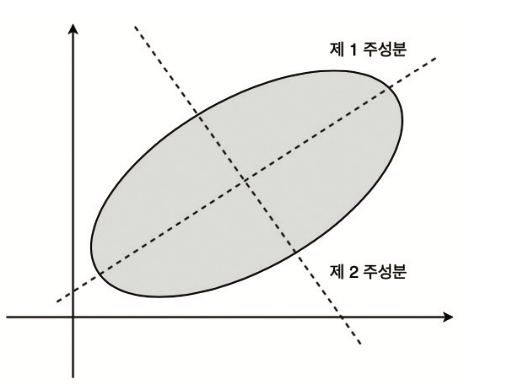

### 주성분 분석 모델 구축
#### 필요 라이브러리 불러오기

#### sklearn 라이브러리의 PCA 함수와 시각화를 위한 matplotlib라이브러리 호출

In [60]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#### 주성분 개수 설정
#### 주성분 분석에서 각 주성분이 설명하는 분산(Variance)-공분산(covariance) 행렬의 고유값과 일치하므로 고유값을 얻어 비교해서 적당한 주성분 개수를 설정한다.
#### 여기서는 주성분 개수를 2개로 설정해 주성분 모델을 설명.

In [38]:
dat_scaled

array([[-0.56825495, -1.07486411,  0.89357395, ..., -1.21122375,
        -0.90446733, -0.90487296],
       [-0.6091277 , -1.07792433,  0.9042037 , ..., -1.21122375,
        -0.88041475, -0.89725075],
       [-0.62956407, -1.07506354,  0.89357395, ..., -1.21122375,
        -0.88522526, -0.89471001],
       ...,
       [ 1.24988445,  2.422503  , -2.20446551, ...,  1.38966752,
         2.51629017,  2.38284074],
       [ 0.53326557,  2.0248662 , -1.87972677, ...,  1.15744508,
         1.79278866,  1.84547486],
       [-0.16810079,  2.0844258 , -2.82896308, ...,  1.15744508,
         2.0414923 ,  2.4306066 ]])

In [39]:
dat_scaled.shape

(3330, 8)

공분산 행렬은 주어진 랜덤 벡터의 각 요소 쌍 사이에 공분산을 제공하는 정방 행렬입니다. <br>
공분산은 두 확률 변수의 공동 변동성의 측도입니다.

In [40]:
scov = np.cov(dat_scaled.T)
scov

array([[ 1.00030039,  0.67497071, -0.53926188, -0.73470589,  0.72407071,
         0.78499032,  0.57340397,  0.56064114],
       [ 0.67497071,  1.00030039, -0.9548588 , -0.93056041,  0.43866263,
         0.92380374,  0.95705014,  0.96194205],
       [-0.53926188, -0.9548588 ,  1.00030039,  0.79763758, -0.33181   ,
        -0.78713058, -0.97563696, -0.99348195],
       [-0.73470589, -0.93056041,  0.79763758,  1.00030039, -0.51572489,
        -0.99380832, -0.80677476, -0.80741365],
       [ 0.72407071,  0.43866263, -0.33181   , -0.51572489,  1.00030039,
         0.55811653,  0.3374599 ,  0.33685328],
       [ 0.78499032,  0.92380374, -0.78713058, -0.99380832,  0.55811653,
         1.00030039,  0.79609016,  0.79674764],
       [ 0.57340397,  0.95705014, -0.97563696, -0.80677476,  0.3374599 ,
         0.79609016,  1.00030039,  0.99471809],
       [ 0.56064114,  0.96194205, -0.99348195, -0.80741365,  0.33685328,
         0.79674764,  0.99471809,  1.00030039]])

In [61]:
scov_df = pd.DataFrame(scov)
scov_df

,0,1,2,3,4,5,6,7
0,1.000300,0.674971,-0.539262,-0.734706,0.724071,0.784990,0.573404,0.560641
1,0.674971,1.000300,-0.954859,-0.930560,0.438663,0.923804,0.957050,0.961942
2,-0.539262,-0.954859,1.000300,0.797638,-0.331810,-0.787131,-0.975637,-0.993482
3,-0.734706,-0.930560,0.797638,1.000300,-0.515725,-0.993808,-0.806775,-0.807414
4,0.724071,0.438663,-0.331810,-0.515725,1.000300,0.558117,0.337460,0.336853
5,0.784990,0.923804,-0.787131,-0.993808,0.558117,1.000300,0.796090,0.796748
6,0.573404,0.957050,-0.975637,-0.806775,0.337460,0.796090,1.000300,0.994718
7,0.560641,0.961942,-0.993482,-0.807414,0.336853,0.796748,0.994718,1.000300


# 주성분 개수 설정
- 주성분 분석에서 각 주성분이 설명하는 분산의 양은 데이터의 분산-공분산 행렬의 고유값과 일치하므로 고유값을 얻어 비교함으로써 적절한 주성분 개수를 설정할 수 있다. numpy의 cov 함수로 분산-공분산 행렬을 구하고, linalg.eig 함수로 고유값 을 구하였다

In [41]:
eigenTuple = np.linalg.eig(scov)
eigenValue = eigenTuple[0]
eigenVector = eigenTuple[1]
print("Eigen Value: ", eigenValue)
print("Eigen Vector: ", eigenVector)

Eigen Value:  [6.26874145e+00 1.15416673e+00 3.45990140e-01 2.01569511e-01
 2.34004684e-02 3.26056532e-03 5.27425519e-03 5.86305665e-18]
Eigen Vector:  [[-3.08137592e-01  4.83164651e-01 -1.32062319e-01 -8.01503001e-01
   6.71515275e-02 -8.50993515e-02 -2.09785501e-03 -1.17852097e-15]
 [-3.93851103e-01 -1.36130314e-01 -5.27626503e-02  7.66611033e-02
   6.05098145e-02  8.29488869e-02 -8.98413640e-01 -3.74540079e-14]
 [ 3.69981288e-01  2.98776775e-01 -2.81801144e-01  1.83875611e-02
  -6.95727048e-01  7.74653002e-02 -2.29053271e-01  3.89350611e-01]
 [ 3.76107778e-01 -7.11184135e-02  4.90996117e-01 -3.33913520e-01
   8.51863984e-02  6.88070992e-01 -1.42166353e-01  4.38302673e-15]
 [-2.23093619e-01  6.89197373e-01  5.55168069e-01  4.07138536e-01
  -3.47326189e-02 -2.55847916e-03 -7.06726052e-03 -2.60568614e-16]
 [-3.77772901e-01  1.26586129e-01 -4.65215664e-01  2.25560254e-01
   4.08812920e-02  7.09938300e-01  2.61298442e-01  2.21413795e-14]
 [-3.73172713e-01 -2.79727134e-01  2.51265998e-01 

In [62]:
scov = np.cov(dat_scaled.T)
eigen_vals, eigen_vecs=np.linalg.eig(scov)

In [63]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
print(var_exp)

[0.7833573682822199, 0.14422751714247303, 0.043235779822428655, 0.025188622416429794, 0.002924180149064083, 0.0006590839164553547, 0.00040744827092923546, 7.326619964577975e-19]


In [64]:
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[0.78335737 0.92758489 0.97082067 0.99600929 0.99893347 0.99959255
 1.         1.        ]


아래 graph는 주성분 개수에 따른 누적설명분산을 그린 것인데, 첫 번째 주성분이 전체 분산의 대부분(80%)을 설명하고, 두 번째 주성분까지 합하면 거의 대 부분의 분산을 설명하는 것을 확인할 수 있다. 여기서는 주성분 개수를 두 개로 설정 해 주성분 모형 구축을 설명하겠다.

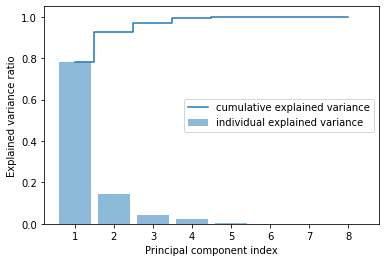

In [42]:
plt.bar(range(1,9), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1,9), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.show()

# PCA 의 PC-Score
- PCA로 얻어진 PC-score(주성분점수) 데이터의 가장 큰 장점은 상호간의 공분산이 존재하는 기존 데이터와 달리 각각의 주성분들은 서로 독립이라는 것이다. 변환된 주 성분점수와 기존 다변량 데이터는 전체적인 변동은 동일하지만, 주성분들이 서로 독 립이기 때문에 주성분 각각의 분산을 계산하는 것만으로도 전체의 분산을 설명할 수 있다는 장점이 있다.
- PCA 결과 기존의 변수들보다 적은 수의 주성분으로 데이터의 주요한 정보들을 반영 할 수 있다. 따라서 사후적인 분석에 사용될 주성분의 개수를 정해야 하는 문제가 있 다. 각 주성분의 설명력은 주성분의 분산이자 고유값들로 대표되는데, 개별 고유값의 크기나 누적 공헌도 등을 비교해 주성분의 개수를 정해준다.

#### 주성분 모형 구축

In [43]:
pca = PCA(n_components = 2)
pcscore = pca.fit_transform(dat_scaled)

In [44]:
pcscore

array([[-2.5651139 , -0.29457297],
       [-2.57102022, -0.26947427],
       [-2.57310291, -0.25664215],
       ...,
       [ 5.33479495,  0.86163026],
       [ 3.89590434,  1.49894498],
       [ 4.59690506,  1.62648073]])

#### n_components에 설정한 주성분 개수(2)를 입력하고 스케일링 된 데이터를 fit_transform 함수를 이용해 주성분으로 변형시킨 뒤, 그 주성분 점수를 pcscore라는 변수에 입력
#### pcscore는 첫 두 개의 주성분을 변수로 갖는 데이터이고, 이를 산점도(scatterplot)로 확인

- 산점도를 확인하면, 오른쪽 정상적으로 분포하는 점들이 있고, 왼쪽에 떨어져 있는 관측치들이 있다. (이 떨어져 있는 점들은 기계의 작동 과정에서 진동이 적은 과정 에 생성되는 데이터로 추정되어 이상치로 분류하지 않는 편이 좋다.) 단순히 그래 프를 보고 판단하는 대신 마할라노비스(Mahalanobis) 거리를 이용해 이상치 점수 (Anomaly score)를 산출할 것이다.

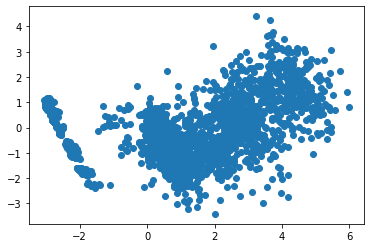

In [45]:
plt.scatter(pcscore[:,0], pcscore[:,1])

### 이상치 점수(Anomaly score) 계산
#### 필요 라이브러리 불러오기

In [46]:
from sklearn.covariance import EmpiricalCovariance, MinCovDet

#### Anomaly score 계산 - 기존 값과의 거리 계산

In [47]:
dat_hat = pca.inverse_transform(pcscore)
dat_hat

array([[-0.64808077, -1.05037325,  1.03705571, ..., -0.93174167,
        -1.03963057, -1.04485163],
       [-0.66202753, -1.04928277,  1.03174203, ..., -0.93715006,
        -1.03481386, -1.03976746],
       [-0.66886932, -1.0483562 ,  1.02867864, ..., -0.93956122,
        -1.03200157, -1.03681768],
       ...,
       [ 1.22754159,  2.21840887, -2.23120942, ...,  1.90627053,
         2.23182127,  2.24537948],
       [ 0.47623735,  1.73845807, -1.88926165, ...,  1.28202144,
         1.87314078,  1.89247198],
       [ 0.63062126,  2.03190946, -2.18672353, ...,  1.53069626,
         2.17041033,  2.19167832]])

In [48]:
diff = pd.DataFrame(np.square(dat_scaled - dat_hat))
diff

,0,1,2,3,4,5,6,7
0,0.006372,0.000600,0.020587,0.084128,0.038628,0.078110,0.018269,0.019594
1,0.002798,0.000820,0.016266,0.081820,0.046292,0.075116,0.023839,0.020311
2,0.001545,0.000713,0.018253,0.080852,0.050384,0.073801,0.021543,0.020195
3,0.003395,0.000597,0.017913,0.082398,0.044555,0.075836,0.021216,0.019856
4,0.002469,0.000823,0.018262,0.083985,0.048876,0.076815,0.022820,0.020848
...,...,...,...,...,...,...,...,...
3325,2.015981,0.025262,0.225324,0.040153,1.149512,0.000625,0.134853,0.001087
3326,0.037731,0.021132,0.035044,0.171026,0.018168,0.094766,0.001477,0.012053
3327,0.000499,0.041654,0.000715,0.084344,0.096921,0.266879,0.080923,0.018896
3328,0.003252,0.082030,0.000091,0.006475,0.000077,0.015519,0.006456,0.002209


In [49]:
anomaly_score1 = diff.sum(axis=1)
anomaly_score1

0       0.266288
1       0.267263
2       0.267286
3       0.265767
4       0.274899
          ...   
3325    3.592795
3326    0.391397
3327    0.590831
3328    0.116110
3329    2.403506
Length: 3330, dtype: float64

#### Anomaly score 계산 - 마할라노비스 거리 계산

In [50]:
robust_cov = MinCovDet().fit(pcscore)
anomaly_score2 = robust_cov.mahalanobis(pcscore)

#### Anomaly score 시각화 - 기존 값과의 거리를 기준으로 한 Anomaly score 시각화


- 첫 번째 이상치 점수의 히스토그램을 그리면, 위 그림과 같이 0 가까이에 몰려있고, 점차 감소하는데, 4 이상의 이상 값들이 비정상적으로 소수 존재하는 것을 확인할 수 있고, 이를 이상치로 간주하고 분류한다.

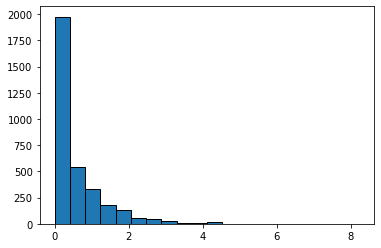

In [51]:
plt.hist(anomaly_score1, edgecolor = "black", bins = 20)
plt.show()

#### 이상치 점수 시각화 - 마할라노비스 거리를 기준으로 한 Anomaly score를 시각화한 코드

- 두 번째 이상치 점수의 히스토그램을 그리면 마찬가지로 0 가까이에 몰려있고, 점차 감소하는 한편, 50 이상에서 빈도수가 늘어나는 것을 확인할 수 있는데, 이를 기반 으로 50을 임계값으로 하여 이상치를 다음 단계에서 분류하고, 결과를 확인하도록 하겠다.

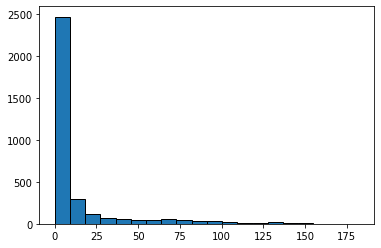

In [52]:
plt.hist(anomaly_score2, edgecolor = "black", bins = 20)
plt.show()

#### 점수 기반 이상치 분류 - np.where 함수를 이용해서 이상치 점수 25를 넘는 값을 Anomaly로 이하를 Normal로 구분

In [53]:
ind = pd.DataFrame({"ind": 
    np.where((anomaly_score1 > 4) | (anomaly_score2 > 50), 
             "2. Anomaly", "1. Normal")})
pcscore = pd.concat([pd.DataFrame(pcscore, columns=['PC1','PC2']),ind], axis = 1)
groups = pcscore.groupby('ind')
pcscore

,PC1,PC2,ind
0,-2.565114,-0.294573,1. Normal
1,-2.571020,-0.269474,1. Normal
2,-2.573103,-0.256642,1. Normal
3,-2.569351,-0.274846,1. Normal
4,-2.558639,-0.256872,1. Normal
...,...,...,...
3325,4.430268,3.146538,2. Anomaly
3326,4.913262,1.252811,2. Anomaly
3327,5.334795,0.861630,2. Anomaly
3328,3.895904,1.498945,2. Anomaly


#### 산점도(scatterplot)로 분류 결과 확인 및 논의

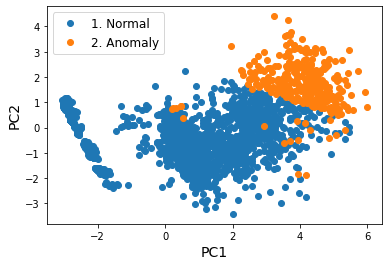

In [54]:
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['PC1'],
            group['PC2'], 
            marker='o', 
            linestyle='',
            label=name)
ax.legend(fontsize=12, loc='upper left')
plt.xlabel('PC1', fontsize=14)
plt.ylabel('PC2', fontsize=14)
plt.show()

#### 제조 현장 관점에서 분석결과 해석하기 - 본 분석에서 활용한 건조구동장치의 데이터는 z축 진동데이터 단 하나의 변수밖에 존재하지 않는다. 제조현장에서는 정형화된 데이터가 존재하기보다는 시점에 따라 연속적으로 데이터가 수집되는 경우가 많은데, PCA를 포함한 여러 가지 분석 방법들을 적용하기 위해서는 다양한 변수가 필요하다. 그래서 본 분석에서처럼 샘플링된 데이터들을 여러 개의 변수로 만드는 과정이 필수적이라고 할 수 있다.